<a href="https://colab.research.google.com/github/thune-work/Write-up-RE/blob/main/DownUnderCTF2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DownUnderCTF 2021**
Author: thunebae

Github: https://github.com/thune-work/Write-up-RE/tree/main/DownUnderCTF2021


*italicized text*# New Section

# 1. No strings

File: [Download](https://github.com/thune-work/Write-up-RE/blob/main/File/nostrings)
*   Thời gian giải: 5 phút
*   Sử dụng IDAPro 64-bit disassembly ra đoạn mã giả bên dưới, ta thấy được dòng số 9 là nhập vào một chuỗi mà chuỗi này chính là flag cần tìm.



```
int __cdecl main(int argc, const char **argv, const char **envp)
{
  int i; // [rsp+Ch] [rbp-64h]
  char s[72]; // [rsp+10h] [rbp-60h] BYREF
  unsigned __int64 v6; // [rsp+58h] [rbp-18h]

  v6 = __readfsqword(0x28u);
  printf("flag? ");
  fgets(s, 70, stdin);
  for ( i = 0; i < strlen(s) - 1; ++i )
  {
    if ( s[i] != LOBYTE(flag[i]) )
    {
      puts("wrong!");
      return -1;
    }
  }
  puts("correct!");
  return 0;
}
```



### FLAG
> DUCTF{stringent_strings_string}



# 2. FLag loader
File: [Download]()

*   Thời gian giải: 13h 
*   *Chú thích:* Bài này tốn khá nhiều time và theo như em thấy rằng em đã sử dụng yếu tố "mò" khá nhiều thay vì đánh giá tính chất toán học để giải quyết vấn đề, cộng thêm phần may mắn để giải được bài toán nên write up này có thể không bao quát được hết tất cả các trường hợp.

Đầu tiên, nhìn vào hàm main, ta thấy được rằng sẽ phải trải qua 3 câu hỏi tương đương với 3 hàm check1, check2, check3. Kết quả của các hàm check được lưu lần lượt tại các biến v4, v5, v6 (kiểu int). Khi đã pass được qua 3 hàm check thì chúng ta sẽ có được flag. 

```
int __cdecl main(int argc, const char **argv, const char **envp)
{
  int v4; // [rsp+Ch] [rbp-124h]
  int v5; // [rsp+10h] [rbp-120h]
  int v6; // [rsp+14h] [rbp-11Ch]
  FILE *stream; // [rsp+18h] [rbp-118h]
  char s[264]; // [rsp+20h] [rbp-110h] BYREF
  unsigned __int64 v9; // [rsp+128h] [rbp-8h]

  v9 = __readfsqword(0x28u);
  init();
  v4 = check1();
  v5 = check2();
  v6 = check3();
  puts("You've passed all the checks! Please be patient as the flag loads.");
  puts("Loading flag... (this may or may not take a while)");
  sleep(v6 * v5 * v4);
  stream = fopen("flag.txt", "r");
  fgets(s, 255, stream);
  printf("%s", s);
  return 0;
}
```

Tuy nhiên, không dễ ăn như vậy, khi ở dòng 17, có một câu lệnh sleep với tham số truyền vào là tích v6, v5 và v4. Như vậy, nếu kết quả tích này lớn, chúng ta có thể chờ đến mùa quýt flag cũng chưa được gửi tới. Do vậy, để không phải chờ, chúng ta sử dụng integer overflow (kỹ thuật được sử dụng chính trong bài này). Chúng ta sẽ điều chỉnh giá trị trả về của các hàm check1, check2, check3 làm sao cho tích v6, v5, v4 sẽ là 2^32 = 4294967296 tương đương với số 0.

Chúng ta xem qua các hàm check1:

```
__int64 check1()
{
  char v1; // [rsp+Ah] [rbp-16h]
  unsigned __int8 v2; // [rsp+Bh] [rbp-15h]
  int i; // [rsp+Ch] [rbp-14h]
  char buf[6]; // [rsp+12h] [rbp-Eh] BYREF
  unsigned __int64 v5; // [rsp+18h] [rbp-8h]

  v5 = __readfsqword(0x28u);
  v1 = 0;
  v2 = 1;
  printf("Give me five letters: ");
  read(0, buf, 5uLL);
  for ( i = 0; i <= 4; ++i )
  {
    v1 += X[i] ^ buf[i];
    v2 *= ((_BYTE)i + 1) * buf[i];
  }
  if ( v1 || !v2 )
    die();
  return v2;
}
```
```
X = [0x44, 0x55, 0x43, 0x54, 0x46]
```

Hàm check1 yêu cầu nhập 1 chuỗi 5 ký tự sao cho sau vòng lặp ở dòng 14 đến 18 thì v1 = 0, còn v2 là cái quần gì cũng được miễn là khác 0. Nhưng theo em, để dễ tính toán thì nên là một luỹ thừa của 2.

```
v1 = X[0]^buf[0] + X[1]^buf[1] + X[2]^buf[2] + X[3]^buf[3] + X[4]^buf[4]
```

Sau khi thử XOR các ký tự chữ thường, chữ in hoa, số trong bảng ASCII với mảng X, thì trong chuỗi 5 ký tự này phải chứa 3 ký tự in hoa và 2 ký tự số thì mới cho ra được v1 = 0. Vì giá trị XOR của các ký tự số với mạng X là rất lớn khoảng tầm 0x63 đến 0x7f, nếu cộng 2 ký tự bất kỳ sẽ cho ra được 1 số gần với 0xff nhất, sau đó cộng thêm 3 kết quả XOR với 3 ký tự in hoa (các kết quả này nhỏ hơn 0x20) thì là vừa đủ. Không thể sử dụng giá trị XOR với mảng X của các ký tự thường vì chúng quá nhỏ.

```
v2 = (120*buf[0]*buf[1]*buf[2]*buf[3]*buf[4])&0xff
```

Giá trị của v2 rất quan trọng vì nó là đầu ra của hàm check1. Và tác giải đúng là không dễ chơi khi cho v2#0. Đến đây, em xin được sử dụng phương pháp "mò". Có 2 kết quả em tìm được thoả check1 là "4SSS5" và "4RSR5". Tuy nhiên, ở kết quả "4RSR5", em tính được giá trị v2 = 128 = 2^6. Kết quả này đẹp tuyệt vời và em quyết định chọn nó.

```
__int64 check2()
{
  unsigned int v1; // [rsp+Ch] [rbp-14h] BYREF
  unsigned int v2; // [rsp+10h] [rbp-10h] BYREF
  unsigned int v3; // [rsp+14h] [rbp-Ch]
  unsigned __int64 v4; // [rsp+18h] [rbp-8h]

  v4 = __readfsqword(0x28u);
  LOWORD(v3) = rand();
  v3 = (unsigned __int16)v3;
  printf("Solve this: x + y = %d\n", (unsigned __int16)v3);
  __isoc99_scanf("%u %u", &v1, &v2);
  if ( !v1 || !v2 || v1 <= v3 || v2 <= v3 )
    die();
  if ( v2 + v1 != v3 || (unsigned __int16)(v1 * v2) <= 0x3Bu )
    die();
  return (unsigned __int16)(v1 * v2);
}
```

Đối với hàm check2, ta cần giải quyết phép toán v1 + v2 = a, với số a được cho random sao cho v1 > a và v2 > a. Nhìn vào ta cũng biết được cần ứng dụng integer overflow để giải quyết phép toán này. Tuy nhiên, cái chúng ta cần quan tâm là đầu ra của hàm check2 (v1*v2). 

Tham vọng của em đối với hàm check2 là để nó ra được kết quả là 2^15. Vì đầu ra này có kiểu unsigned __int16, số dương lớn nhất của nó chính là 2^15. Do đó, theo như 2 số em in ra bên dưới tương đương:

```
v1 = a + 32768
v2 = - 32768
```

Thì v1*v2 = (a + 2^15) * (-2)^15 tương đương shift right a + 2^15, 15 bit. Do a + 2^15 > 2^15 nên kết quả đầu ra sẽ là 2^15. 

***Lưu ý***: Dù suy luận là như vậy nhưng chưa bao quát vì đối với các số a cho trước mà chỉ có 4 chữ số thì em thấy kết quả sai :")) Không sao, em cứ thấy số a 5 chữ số thì em vọc không thì bỏ. 



In [ ]:
a = 32919
print(str(a + 32768) + " " + str(4294967296 - 32768))

Như vậy, ta đã có check1(2) = 2^6, check2() = 2^15, suy ra check3() = 2^11 mới không phải đợi chờ trong vô vọng như em đã từng. 

```
__int64 check3()
{
  unsigned int v1; // [rsp+0h] [rbp-20h] BYREF
  unsigned int v2; // [rsp+4h] [rbp-1Ch] BYREF
  unsigned int v3; // [rsp+8h] [rbp-18h] BYREF
  unsigned int v4; // [rsp+Ch] [rbp-14h] BYREF
  unsigned int v5; // [rsp+10h] [rbp-10h] BYREF
  int v6; // [rsp+14h] [rbp-Ch]
  unsigned __int64 v7; // [rsp+18h] [rbp-8h]

  v7 = __readfsqword(0x28u);
  LOWORD(v6) = rand();
  v6 = (unsigned __int16)v6;
  printf("Now solve this: x1 + x2 + x3 + x4 + x5 = %d\n", (unsigned __int16)v6);
  __isoc99_scanf("%u %u %u %u %u", &v1, &v2, &v3, &v4, &v5);
  if ( !v1 || !v2 || !v3 || !v4 || !v5 )
    die();
  if ( v1 >= v2 || v2 >= v3 || v3 >= v4 || v4 >= v5 )
    die();
  if ( v5 + v4 + v3 + v2 + v1 != v6 || (unsigned __int16)((v3 - v2) * (v5 - v4)) <= 0x3Bu )
    die();
  return (unsigned __int16)((v3 - v2) * (v5 - v4));
}
```

Trong check3, cần thoả v1 + v2 + v3 + v4 + v5 = a, với a là random sao cho v1 < v2 < v3 < v4 < v5. Kết quả đầu ra là (v3 - v2)*(v5 - v4) cũng là kiểu unsigned __int16. Do 2^11 < 2^15 nên yên tâm là kết quả sẽ ra dương. 

Tham vọng của em là làm cho v3 - v2 = 2^5, còn v5 - v4 = 2^6. Và em chia được như sau:

```
a = (a - 96) + (a + 33) + (a + 2^5 + 33) - (a + 33) - (a - 2^6 + 33)
v1 = a - 96
v2 = a + 33
v3 = a + 2^5 + 33
v4 = a + 33
v5 = a - 2^6 + 33
```


In [ ]:
a = 37171
#a - 96 + (a + 33) + (a+2**5 + 33) - (a + 33) - (a - 2**6 + 33)
print (str(a - 96)  +" " + str(a + 33) +" " + str(a+2**5 + 33)  + " "+  str(4294967296 - (a+33)) +" " + str(4294967296 - (a - 2**6 + 33)) )

Cuối cùng, sau 13 tiếng đồng hò mò tới mò lui, thì flag đã hiện ra mà không phải chờ 1s nào.

> DUCTF{y0u_sur3_kn0w_y0ur_int3gr4l_d4t4_typ3s!}

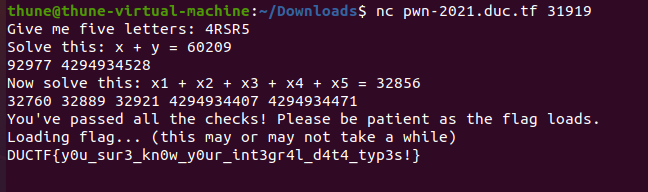
